In [11]:
import time
import os
import cv2 as cv
import numpy as np
import math
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image
from matplotlib import pyplot as plt

In [12]:
# set image path
img_dir = os.path.join(os.getcwd(), "images")
basic_img_path = os.path.join(img_dir, "cityscape_basic_2.png")
#basic_img_path = os.path.join(img_dir, "cityscape_basic.png")
#basic_img_path = os.path.join(img_dir, "cityscape_basic.png")

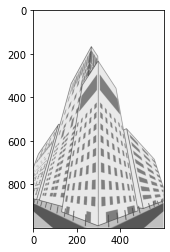

In [13]:
# read image in
src = cv.imread(basic_img_path, cv.IMREAD_GRAYSCALE)

plt.imshow(src, cmap='gray',)

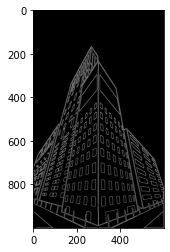

In [14]:
# perform canny edge detector
dst = cv.Canny(src, 50, 200, None, 3)

plt.imshow(dst, cmap='gray')

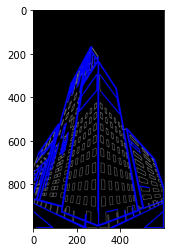

In [30]:
# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
        
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        
plt.imshow(cdst, cmap='gray')

<ipython-input-31-a799e1542e50>:9: RuntimeWarning: divide by zero encountered in true_divide
  slopes = (p2coords[:,1] - p1coords[:,1]) / (p2coords[:,0] - p1coords[:,0])


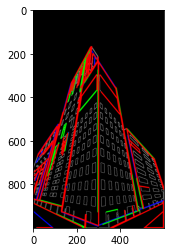

In [31]:
n, one, four = linesP.shape
coords = np.reshape(linesP, (n, 4))

# get p1coords and p2 coords
p1coords = coords[:,0:2]  # x1, y1
p2coords = coords[:,2:4]  # x2, y2

# thetas are slope of line between point 1 and point 2
slopes = (p2coords[:,1] - p1coords[:,1]) / (p2coords[:,0] - p1coords[:,0])

# eliminate points with infinite slope
good_indices = np.isfinite(slopes)
p1coords = p1coords[good_indices]
p2coords = p2coords[good_indices]
lengths = np.linalg.norm(p2coords - p1coords, axis=1)
slopes = slopes[good_indices]
angles = np.arctan(slopes)
unit_x = np.cos(angles)
unit_y = np.sin(angles)

unit_coords = np.vstack((unit_x, unit_y)).T
# cluster based on x, y coordinates of points on unit circle
kmeans = KMeans(n_clusters=3, n_init=100)
kmeans_labels = kmeans.fit_predict(unit_coords)

cluster_0_indices = np.argwhere(kmeans_labels == 0)
cluster_1_indices = np.argwhere(kmeans_labels == 1)
cluster_2_indices = np.argwhere(kmeans_labels == 2)

cluster_0_lines = coords[cluster_0_indices].reshape(-1,4)
cluster_1_lines = coords[cluster_1_indices].reshape(-1,4)
cluster_2_lines = coords[cluster_2_indices].reshape(-1,4)

# display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
if cluster_0_lines is not None:
    for l in cluster_0_lines:
        cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        
if cluster_1_lines is not None:
    for l in cluster_1_lines:
        cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,255,0), 3, cv.LINE_AA)
        
if cluster_2_lines is not None:
    for l in cluster_2_lines:
        cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)
        
plt.imshow(cdst, cmap='gray')